In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [2]:
df = pd.read_csv("housing.csv")             #loading housing_data

In [3]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

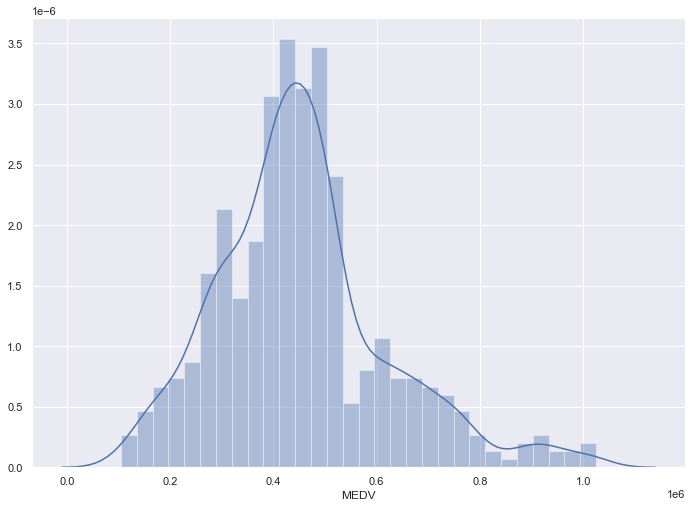

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

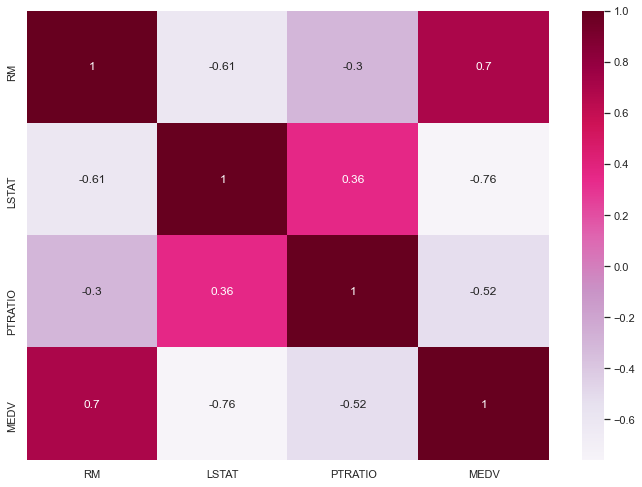

In [6]:
correlation_matrix = df.corr().round(2)                              # annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="PuRd")

### RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

In [7]:
from sklearn import linear_model

In [8]:
X = df[['RM','LSTAT','PTRATIO']]
y = df['MEDV']

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [10]:
predictedMEDV = regr.predict([[6.030,7.88,21.0]])

In [11]:
predictedMEDV 

array([442625.53983616])

In [12]:
print(regr.coef_)

[ 86565.23613299 -10849.34038381 -19492.11563515]


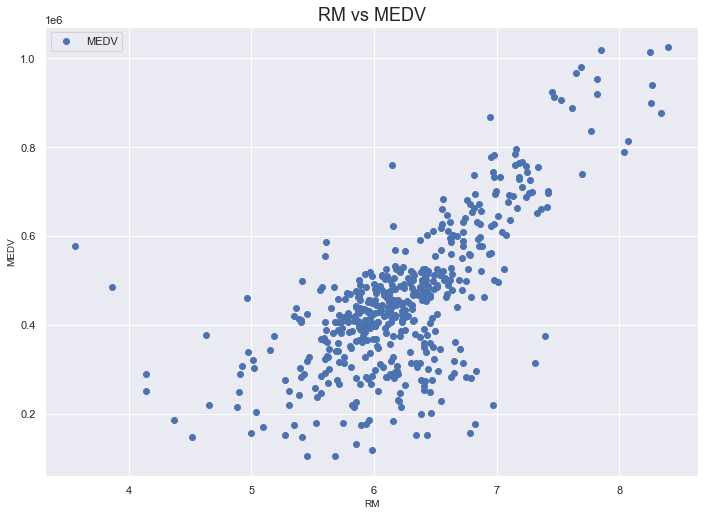

In [13]:
df.plot(x='RM', y='MEDV', style='o')  
plt.title('RM vs MEDV', fontsize= 18)    
plt.xlabel('RM',fontsize = 10)  
plt.ylabel('MEDV',fontsize = 10)  
plt.show()

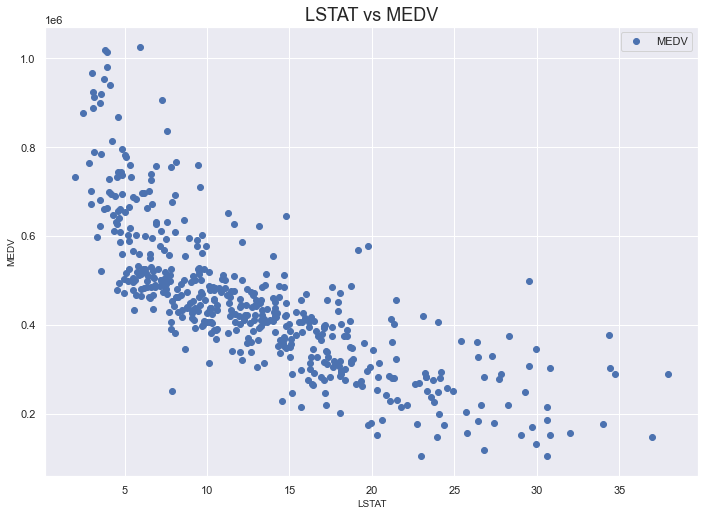

In [14]:
df.plot(x='LSTAT', y='MEDV', style='o')  
plt.title('LSTAT vs MEDV', fontsize= 18)   
plt.xlabel('LSTAT',fontsize = 10)  
plt.ylabel('MEDV',fontsize = 10)  
plt.show()

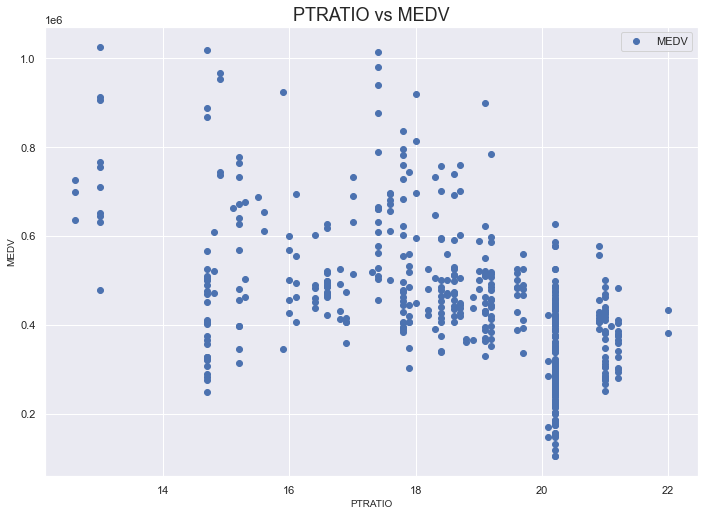

In [15]:
df.plot(x='PTRATIO', y='MEDV', style='o')  
plt.title('PTRATIO vs MEDV', fontsize= 18)   
plt.xlabel('PTRATIO',fontsize = 10)  
plt.ylabel('MEDV',fontsize = 10)  
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(391, 3)
(98, 3)
(391,)
(98,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn import metrics                              # model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
rmse

87771.10980988554

In [19]:
r2

0.7103793779017609

In [20]:
y_test_predict = lin_model.predict(X_test)                      # model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)
rmse

88710.55452921003

In [21]:
r2

0.7376092911908392

In [22]:
features=['RM','LSTAT','PTRATIO']

In [23]:
coef2 = pd.Series(lin_model.coef_,features).sort_values()
coef2

PTRATIO   -19813.906548
LSTAT     -11047.720988
RM         77112.412741
dtype: float64

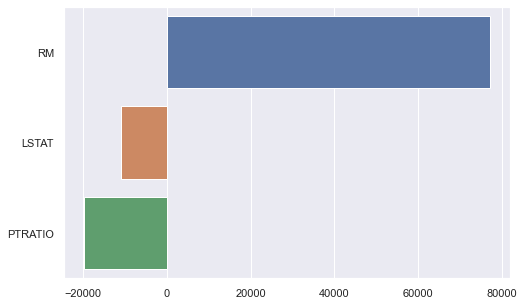

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(lin_model.coef_,features)

# Evaluation Metrics

a) R-Squared:

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [25]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_test_predict)
R2

0.7376092911908392

Adjusted R Squared

The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

Hence, To control this situation Adjusted R Squared came into existence.

Now as K increases by adding some features so the denominator will decrease, n-1 will remain constant. R2 score will remain constant or will increase slightly so the complete answer will increase and when we subtract this from one then the resultant score will decrease. so this is the case when we add an irrelevant feature in the dataset.

And if we add a relevant feature then the R2 score will increase and 1-R2 will decrease heavily and the denominator will also decrease so the complete term decreases, and on subtracting from one the score increases.

In [26]:
n=489
k=3                                      #k=No. of independent variables
adj_R2_score = 1 - ((1-R2)*(n-1)/(n-k-1))
print(adj_R2_score)

0.7359862558786175


b) MAE and MSE:

MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances 
from the points to the regression line (these distances are the “errors”) and squaring them.

In [27]:
MAE= metrics.mean_absolute_error(y_test,y_test_predict)
MSE= metrics.mean_squared_error(y_test,y_test_predict)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 67079.29625509697
mean squared error: 7869562484.879945


c) RMSE:

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [28]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 88710.55452921003


d)RMSLE

Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

To control this situation of RMSE we take the log of calculated RMSE error and resultant we get as RMSLE.

To perform RMSLE we have to use the NumPy log function over RMSE.

In [29]:
RMSLE = np.log(np.sqrt(mean_squared_error(y_test,y_test_predict)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_test_predict))))

RMSLE 11.393134152528914


In [30]:
print("R2 value:",R2)
print("Adjusted R2 value:",adj_R2_score)


R2 value: 0.7376092911908392
Adjusted R2 value: 0.7359862558786175


In [31]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)
print("Root Mean Squared Error:",rmse)
print("Root Mean Squared Log Error:", RMSLE)

mean absolute error: 67079.29625509697
mean squared error: 7869562484.879945
Root Mean Squared Error: 88710.55452921003
Root Mean Squared Log Error: 11.393134152528914
